### Code to extract and plot spectra from a single NEON AOP pixel
Leticia Lee  
July 10, 2018  
leticial@bu.edu  

The goal is to extract a single pixel from a hyperspectral hdf5 file and plot 3 figures, both without removing the bad bands of unusable data and with those bands, we also want to export a csv of the cleaned wavelength and reflectance info for later use.

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import copy
import IPython
%matplotlib inline

/anaconda3/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
refl_filename = ('../data/NEON_D17_SJER_DP1_20180401_184649_reflectance.h5')
refl_filename

'../data/NEON_D17_SJER_DP1_20180401_184649_reflectance.h5'

In [3]:
pixel_to_plot = (100,100)
pixel_to_plot

(100, 100)

In [4]:
#read in reflectance hdf5 file
hdf5_file = h5py.File(refl_filename, 'r')
hdf5_file

<HDF5 file "NEON_D17_SJER_DP1_20180401_184649_reflectance.h5" (mode r)>

In [5]:
#get the file name
file_attrs_string = str(list(hdf5_file.items()))
file_attrs_string

'[(\'SJER\', <HDF5 group "/SJER" (1 members)>)]'

In [6]:
file_attrs_string_split = file_attrs_string.split("'")
file_attrs_string_split

['[(', 'SJER', ', <HDF5 group "/SJER" (1 members)>)]']

In [7]:
sitename = file_attrs_string_split[1]
sitename

'SJER'

In [8]:
#extract the reflectance
refl = hdf5_file[sitename]["Reflectance"]
refl

<HDF5 group "/SJER/Reflectance" (2 members)>

In [9]:
list(refl.attrs)

['Description',
 'Sensor',
 'PayloadID',
 'Scripts',
 'Acquisition_Time',
 'Band_Window_1_Nanometers',
 'Band_Window_2_Nanometers']

In [10]:
#get the reflectance data
refldata = refl['Reflectance_Data']
refldata

<HDF5 dataset "Reflectance_Data": shape (216, 699, 426), type "<i2">

In [11]:
#get the raw data
reflRaw = refl['Reflectance_Data'].value
reflRaw

array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -99

In [12]:
#create a dictionary that contains relevant metadata information 
#make empty dictionary first - key value store

metadata = {}
metadata

{}

In [13]:
#store the map info into key of the same name
metadata['map_info'] = refl['Metadata']['Coordinate_System']['Map_Info'].value
metadata

{'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0'}

In [14]:
#store the wavelength info into a key of the same name
metadata['wavelength'] = refl['Metadata']['Spectral_Data']['Wavelength'].value
metadata

{'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.910278,  646.920471,  651.930786,
         656.941101,  661.951416,  666.

In [15]:
#extract the no data value and store into the dict
metadata['data_ignore_value']=float(refldata.attrs['Data_Ignore_Value'])
metadata

{'data_ignore_value': -9999.0,
 'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.910278,  646.920471,  651.930786,
        

In [16]:
#extract the scale factor and store into dict
metadata['reflectance_scale_factor']=float(refldata.attrs['Scale_Factor'])
metadata

{'data_ignore_value': -9999.0,
 'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'reflectance_scale_factor': 10000.0,
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.9102

In [17]:
#apply the no data value

#convert raw reflectance into type float (was integer, see above)
reflClean = reflRaw.astype(float)
reflClean

array([[[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-99

In [18]:
#capture the shape
arr_size = reflClean.shape
arr_size

(216, 699, 426)

In [19]:
number_of_values_where_no_data = np.count_nonzero(reflClean == metadata['data_ignore_value'])
number_of_values_where_no_data

31535502

In [20]:
total_number_of_values_in_array = (arr_size[0]*arr_size[1]*arr_size[2])
total_number_of_values_in_array

64319184

In [21]:
#check for the number of missing data points
#no result means all clean
if metadata['data_ignore_value'] in reflRaw:
    #print out the percent with no data rounded to 1 decimal place
    print('% of points with no data: ',
         np.round(number_of_values_where_no_data * 100 / total_number_of_values_in_array, 1 ))
    #replace ignore values with NaNs
    nodata_ind = np.where(reflClean == metadata['data_ignore_value'])
    reflClean[nodata_ind] = np.nan

% of points with no data:  49.0


In [22]:
#apply scale factor
reflArray = reflClean / metadata['reflectance_scale_factor']
reflArray

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [23]:
#extract spatial extent from attributes
metadata['spatial_extent'] = refldata.attrs['Spatial_Extent_meters']
metadata

{'data_ignore_value': -9999.0,
 'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'reflectance_scale_factor': 10000.0,
 'spatial_extent': array([ 254192.,  254891., 4102667., 4102883.]),
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  

In [24]:
#bad band windows
metadata['bad_band_window1'] = (refl.attrs['Band_Window_1_Nanometers'])
metadata['bad_band_window2'] = (refl.attrs['Band_Window_2_Nanometers'])

In [25]:
#projection info
metadata['epsg']=int(refl['Metadata']['Coordinate_System']['EPSG Code'].value)
metadata['epsg']

32611

In [26]:
#extract map info: spatial extent and resolution
mapInfo=refl['Metadata']['Coordinate_System']['Map_Info'].value
mapInfo

b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0'

In [27]:
hdf5_file.close

<bound method File.close of <HDF5 file "NEON_D17_SJER_DP1_20180401_184649_reflectance.h5" (mode r)>>

In [28]:
#make a new empty pandas dataframe
serc_pixel_df = pd.DataFrame()

In [29]:
#add a column of reflectance data from the cleaned reflectance array
serc_pixel_df['reflectance']=reflArray[pixel_to_plot[0],pixel_to_plot[1],:]

In [30]:
#add second column with the wavelength info
serc_pixel_df['wavelengths']=metadata['wavelength']

In [31]:
serc_pixel_df.head(5)

,reflectance,wavelengths
0,0.0233,381.375793
1,0.0326,386.385986
2,0.0337,391.396301
3,0.0359,396.406586
4,0.0347,401.416901


In [32]:
serc_pixel_df.tail(5)

,reflectance,wavelengths
421,0.0918,2490.703125
422,0.1010,2495.713379
423,0.0983,2500.723633
424,0.0850,2505.733887
425,0.0836,2510.744141


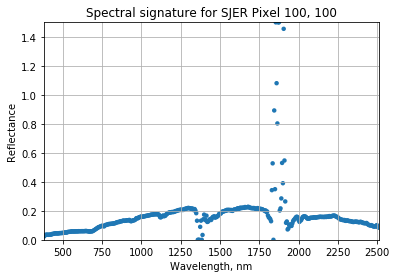

In [33]:
#make a plot
serc_pixel_df.plot(x = 'wavelengths', y = 'reflectance', kind = 'scatter', edgecolor = 'none')
plt.title('Spectral signature for ' + sitename + ' Pixel ' +', '.join(map(str,pixel_to_plot)))
ax = plt.gca() #gca = get current axes
ax.set_xlim([np.min(serc_pixel_df['wavelengths']),
            np.max(serc_pixel_df['wavelengths'])])
ax.set_ylim([np.min(serc_pixel_df['reflectance']),
            np.max(serc_pixel_df['reflectance'])])
ax.set_xlabel("Wavelength, nm")
ax.set_ylabel("Reflectance")
ax.grid(True)
fig = ax.get_figure()
fig.savefig('output/figs/'+sitename+"_plot1.png")

In [34]:
bbw1 = metadata['bad_band_window1']
print('Bad Band Window 1:', bbw1)
bbw2 = metadata['bad_band_window2']
print('Bad Band Window 2:', bbw2)

Bad Band Window 1: [1340 1445]
Bad Band Window 2: [1790 1955]


In [35]:
# make a copy to deal with the mutable data type
from copy import copy
w = copy(metadata['wavelength'])

# can also use bbw1[0] or bbw1[1] to avoid hard-coding in
w[((w >= 1340) & (w <= 1445)) | ((w >= 1790) & (w <= 1955))] = np.nan 

# the last 10 bands sometimes have noise - best to eliminate
w[-10:] = np.nan

# optionally print wavelength values to show that -9999 values are replaced with nan
w

array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
        406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
        431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
        456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
        481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
        506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
        531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
        556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
        581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
        606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
        631.889709,  636.900024,  641.910278,  646.920471,  651.930786,
        656.941101,  661.951416,  666.961609,  671.971924,  676.982178,
        681.992493,  687.002808,  692.013   ,  697.023315,  702.03363 ,
        707.043884,  712.054199,  717.064392,  722.074707,  727.

In [36]:
serc_pixel_df['wavelengths'] = w
serc_pixel_df.to_csv('output/csv/'+sitename+'.csv')

/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


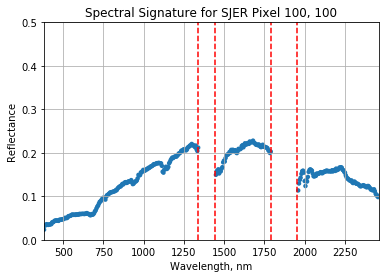

In [37]:
serc_pixel_df.plot(x='wavelengths',
                   y='reflectance',
                   kind='scatter',
                   edgecolor='none')

plt.title('Spectral Signature for '+sitename+' Pixel '+', '.join(map(str, pixel_to_plot)))

ax2 = plt.gca() # stands for 'get current axis'
ax2.grid('on')
ax2.set_xlim([np.min(serc_pixel_df['wavelengths']),
              np.max(serc_pixel_df['wavelengths'])])
ax2.set_ylim(0,0.5)
ax2.set_xlabel("Wavelength, nm")
ax2.set_ylabel("Reflectance")

#Add in red dotted lines to show boundaries of bad band windows:
ax2.plot((1340,1340), (0,1.5), 'r--')
ax2.plot((1445,1445), (0,1.5), 'r--')
ax2.plot((1790,1790), (0,1.5), 'r--')
ax2.plot((1955,1955), (0,1.5), 'r--')


In [38]:
%whos

Variable                          Type           Data/Info
----------------------------------------------------------
IPython                           module         <module 'IPython' from '/<...>ges/IPython/__init__.py'>
arr_size                          tuple          n=3
ax                                AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
ax2                               AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
bbw1                              ndarray        2: 2 elems, type `int32`, 8 bytes
bbw2                              ndarray        2: 2 elems, type `int32`, 8 bytes
copy                              function       <function copy at 0x10c01f7b8>
fig                               Figure         Figure(432x288)
file_attrs_string                 str            [('SJER', <HDF5 group "/SJER" (1 members)>)]
file_attrs_string_split           list           n=3
h5py                              module         <module 'h5py' from '/ana<...>ckages/h5py/__i

In [39]:
print(IPython.sys_info())

{'commit_hash': '7f10f7bb3',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/anaconda3/envs/py35/lib/python3.5/site-packages/IPython',
 'ipython_version': '6.4.0',
 'os_name': 'posix',
 'platform': 'Darwin-17.6.0-x86_64-i386-64bit',
 'sys_executable': '/anaconda3/envs/py35/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.5.5 |Anaconda custom (64-bit)| (default, Apr 26 2018, '
                '08:11:22) \n'
                '[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'}
